In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams.update({'font.size': 16})
plt.close('all')

In [92]:
def noiseTemp(NF):
    return (10**(NF/10.)-1)*296.5

In [93]:
#input data

hpFreqArr = np.array([50,80,110,140,170,200, 230, 260, 290, 300])

NF_134K_1_30_22 = np.array([.34, .29, .4, .43, .39, .51, .61, .62, .51, .48])
G_134K_1_30_22 = np.array([.30, .20, .16, .23, .25, .33, .25, .32, .40, .39]) + 40

NF_141K_2_18_22 = np.array([.37, .32, .43, .47, .42, .56, .64, .65, .54, .51])
G_141K_2_18_22 = np.array([.37, .33, .30, .27, .32, .40, .34, .36, .42, .45]) + 40

NF_176K_2_18_22 = np.array([.42, .39, .50, .54, .48, .64, .73, .70, .59, .57])
G_176K_2_18_22 = np.array([.52, .45, .42, .41, .42, .49, .42, .46, .51, .54]) + 40

NF_191K_2_18_22 = np.array([.45, .41, .52, .54, .50, .66, .76, .72, .61, .59])
G_191K_2_18_22 = np.array([.51, .45, .40, .39, .40, .47, .40, .43, .48, .50]) + 40

NF_315K_2_18_22 = np.array([.91, .79, .85, .87, .83, .97, 1.07, 1.04, .93, .90])
G_315K_2_18_22 = np.array([.23, .07, .11, .06, .14, .14, .07, .10, .14, .12]) + 40

NF_RT_1_31_22 = np.array([.97, .78, 1.09, .84, .81, 1.03, 1.05, 1.01, .92, .89])
G_RT_1_31_22 = np.array([.35, .19, .21, .18, .24, .22, .15, .21, .24, .22]) + 40

freq_12_21_21, G_RT_12_21_21, NF_RT_12_21_21 = np.loadtxt('PE15A1012_Neuhauser_12-21.txt', skiprows=1, unpack=1)
freq_12_21_21, G_RT_12_21_21, NF_RT_12_21_21 = freq_12_21_21[1:], G_RT_12_21_21[1:], NF_RT_12_21_21[1:]

freq_1_6_22, G_296K_1_6_22, NF_296K_1_6_22 = np.loadtxt('coldData_1-6-22.txt', skiprows=1, unpack=1, \
                                                        max_rows=6, usecols=[0,2,3])
freq_1_6_22, G_208K_1_6_22, NF_208K_1_6_22 = np.loadtxt('coldData_1-6-22.txt', skiprows=7, unpack=1, \
                                                        max_rows=6, usecols=[0,2,3])
freq_1_6_22, G_165K_1_6_22, NF_165K_1_6_22 = np.loadtxt('coldData_1-6-22.txt', skiprows=13, unpack=1, \
                                                        max_rows=6, usecols=[0,2,3])

NF_165K_1_6_22

array([0.35, 0.45, 0.36, 0.64, 0.52, 0.62])

In [94]:
%matplotlib qt
freqs, termHot, biconHot = np.loadtxt('RoomTempAmp_2-11-22.txt', unpack = 1, skiprows=1)
freqs, termHot, biconHot = freqs[1400:], termHot[1400:], biconHot[1400:]

freqs, termCold, biconCold = np.loadtxt('ColdTempAmp_2-11-22.txt', unpack = 1, skiprows=1)
freqs, termCold, biconCold = freqs[1400:], termCold[1400:], biconCold[1400:]

plt.plot(freqs, biconHot)
plt.plot(freqs, biconCold)


In [99]:
%matplotlib qt

plt.figure()
plt.plot(hpFreqArr, noiseTemp(NF_134K_1_30_22), label = '134K, 1/30/22')
plt.plot(hpFreqArr, noiseTemp(NF_141K_2_18_22), label = '141K, 2/18/22')
plt.plot(freq_1_6_22, noiseTemp(NF_165K_1_6_22), label = '165K, 1/6/22')
plt.plot(hpFreqArr, noiseTemp(NF_176K_2_18_22), label = '176K, 2/18/22')
plt.plot(hpFreqArr, noiseTemp(NF_191K_2_18_22), label = '191K, 2/18/22')
plt.plot(freq_1_6_22, noiseTemp(NF_208K_1_6_22), label = '208K, 1/6/22')
plt.plot(freq_1_6_22, noiseTemp(NF_296K_1_6_22), label = '296K, 1/6/22')
plt.plot(hpFreqArr, noiseTemp(NF_315K_2_18_22), label = '315K, 2/18/22')
#plt.plot(hpFreqArr, noiseTemp(NF_RT_1_31_22), label = 'Room Temp, 1/31/22')
plt.title('Noise Temperture vs. Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Noise Temperture (K)')
plt.legend()




In [100]:
plt.figure()
plt.title('Gain vs. Frequency 2/18/22')
#plt.plot(hpFreqArr, G_134K_1_30_22, label = '134K, 1/30/22')
plt.plot(hpFreqArr, G_141K_2_18_22, label = '141K, 2/18/22')
plt.plot(hpFreqArr, G_176K_2_18_22, label = '176K, 2/18/22')
plt.plot(hpFreqArr, G_191K_2_18_22, label = '191K, 2/18/22')
plt.plot(hpFreqArr, G_315K_2_18_22, label = '315K, 2/18/22')
#plt.plot(hpFreqArr, G_295_1_31_22, label = 'Room Temp, 1/31/22')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain (dB)')
plt.legend()

In [104]:
plt.figure()
plt.title('Average Noise Temperature vs Amp Temperature')

tempArr = np.array([134, 141, 165, 176, 191, 208, 296, 315])
avgNTArr = np.array([noiseTemp(NF_134K_1_30_22.mean()),\
                     noiseTemp(NF_141K_2_18_22.mean()),\
                     noiseTemp(NF_165K_1_6_22.mean()),\
                     noiseTemp(NF_176K_2_18_22.mean()),\
                     noiseTemp(NF_191K_2_18_22.mean()),\
                     noiseTemp(NF_208K_1_6_22.mean()),\
                     #noiseTemp(NF_RT_1_31_22.mean()),\
                     #noiseTemp(NF_RT_12_21_21.mean()),\
                     noiseTemp(NF_296K_1_6_22.mean()),\
                     noiseTemp(NF_315K_2_18_22.mean())]) 

fit = np.polyfit(tempArr, avgNTArr, 1)
linTemp = np.linspace(0,315,100)
print(fit)


plt.xlabel('Physical Amp Temp. (K)')
plt.ylabel('Noise Temp. (K)')
plt.grid()
plt.ylim(0,72)

plt.scatter(tempArr, avgNTArr)
plt.plot(tempArr, avgNTArr, label = 'Data')
plt.plot(linTemp, fit[0]*linTemp + fit[1], label = ('Linear Extrapolation'))
plt.plot(0, fit[1], marker="o", markersize=20, markeredgecolor="red", markerfacecolor="white")
plt.text(13,5, '(0K, %i' %round(fit[1]) +'K)')
plt.legend()

[0.19305756 5.73026731]


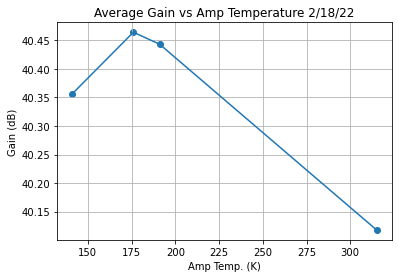

In [294]:
%matplotlib inline

plt.figure()
plt.title('Average Gain vs Amp Temperature 2/18/22')

tempArr = np.array([#134,\
                    141,\
                    #165,\
                    176,\
                    191,\
                    #208,\
                    #295,\
                    #296,\
                    315])

avgNTArr = np.array([#G_134K_1_30_22.mean(),\
                     G_141K_2_18_22.mean(),\
                     #G_165K_1_6_22.mean(),\
                     G_176K_2_18_22.mean(),\
                     G_191K_2_18_22.mean(),\
                     #G_208K_1_6_22.mean(),\
                     #G_RT_1_31_22.mean(),\
                     #G_296K_1_6_22.mean(),\
                     G_315K_2_18_22.mean()]) 

plt.xlabel('Amp Temp. (K)')
plt.ylabel('Gain (dB)')
plt.scatter(tempArr, avgNTArr)
plt.plot(tempArr, avgNTArr)
plt.grid()

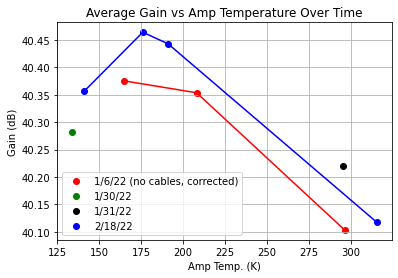

In [283]:
plt.figure()
plt.title('Average Gain vs Amp Temperature Over Time')

tempArr_2_18 = np.array([141,\
                    176,\
                    191,\
                    315])

avgNTArr_2_18 = np.array([G_141K_2_18_22.mean(),\
                     G_176K_2_18_22.mean(),\
                     G_191K_2_18_22.mean(),\
                     G_315K_2_18_22.mean()]) 

tempArr_1_6 = np.array([165,\
                    208,\
                    296])

avgNTArr_1_6 = np.array([G_165K_1_6_22.mean(),\
                     G_208K_1_6_22.mean(),\
                     G_296K_1_6_22.mean()]) 
avgNTArr_1_6 = avgNTArr_1_6 - .298 #correct for cables. See pg 130 JL lab book.



plt.xlabel('Amp Temp. (K)')
plt.ylabel('Gain (dB)')


plt.scatter(tempArr_1_6, avgNTArr_1_6, color ='r', label = "1/6/22 (no cables, corrected)")
plt.plot(tempArr_1_6, avgNTArr_1_6, color = 'r')

plt.scatter(134, G_134K_1_30_22.mean(), color='g', label = '1/30/22')

plt.scatter(295, G_RT_1_31_22.mean(), color='k', label = '1/31/22')

plt.scatter(tempArr_2_18, avgNTArr_2_18, color ='b', label = "2/18/22")
plt.plot(tempArr, avgNTArr_2_18, color = 'b')

plt.legend()
plt.grid()

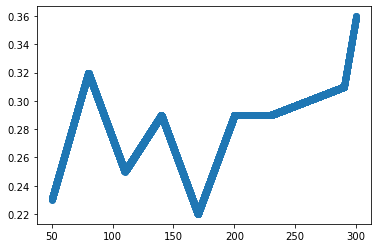

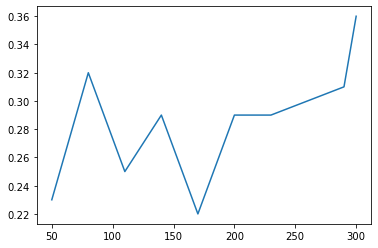

In [334]:
#gain corrrection
%matplotlib inline
plt.figure()
G_correct = G_176K_2_18_22  - G_315K_2_18_22 - .06 #.06 in bs manual interpolation from previous gain vs frequency plot because amp temp is 159 and I didn't take gain data there
G_correct_interp = interp1d(hpFreqArr, G_correct)
plt.scatter(freqs, G_correct_interp(freqs))


plt.figure()
plt.plot(hpFreqArr, G_correct)


0.1782856376353834
0.04190605941151215


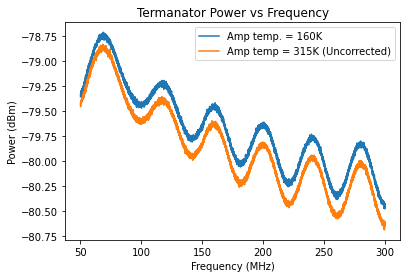

In [327]:
%matplotlib inline

plt.figure()
plt.title('Termanator Power vs Frequency')

plt.plot(freqs, termCold, label = 'Amp temp. = 160K')
plt.plot(freqs, termHot, label = 'Amp temp = 315K (Uncorrected)')
plt.legend()

plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

difference = termCold.mean() - (termHot).mean()
print(difference)
print(10**(difference/10) - 1)

-0.10272333244266463
-0.02337538355307056


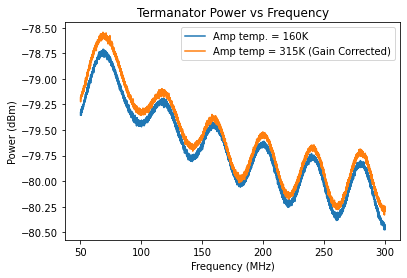

In [335]:
%matplotlib inline

plt.figure()
plt.title('Termanator Power vs Frequency')

plt.plot(freqs, termCold, label = 'Amp temp. = 160K')
plt.plot(freqs, termHot + G_correct_interp(freqs), label = 'Amp temp = 315K (Gain Corrected)')
plt.legend()

plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

difference = termCold.mean() - (termHot + G_correct_interp(freqs)).mean()
print(difference)
print(10**(difference/10) - 1)

-0.0499866817867769
-0.011443873809934946


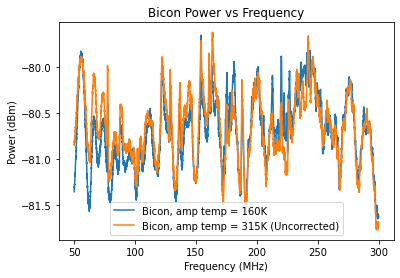

In [307]:
%matplotlib qt

plt.figure()

plt.title('Bicon Power vs Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')

plt.plot(freqs, biconCold, label = 'Bicon, amp temp = 160K')
plt.plot(freqs, biconHot , label = 'Bicon, amp temp = 315K (Uncorrected)')
plt.legend()

difference = biconCold.mean() - (biconHot).mean()
print(difference)
print(10**(difference/10) - 1)

-0.33099565186485336
-0.07338263478193852


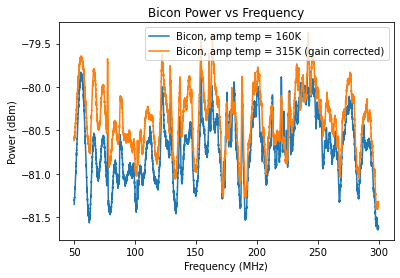

In [308]:
%matplotlib qt

plt.figure()

plt.title('Bicon Power vs Frequency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dBm)')


plt.plot(freqs, biconCold, label = 'Bicon, amp temp = 160K')
plt.plot(freqs, biconHot + G_correct_interp(freqs), label = 'Bicon, amp temp = 315K (gain corrected)')
plt.legend()

difference = biconCold.mean() - (biconHot + G_correct_interp(freqs)).mean()
print(difference)
print(10**(difference/10) - 1)

In [336]:
noisePercentImprovement = np.linspace(0, 25, 100)



matplotlib.colors.LinearSegmentedColormap